In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Dermatology/dermatology_database_1.csv'

Mounted at /content/drive


In [4]:
df = pd.read_csv(file_path)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

**Handling missing values**

In [6]:
df.isna().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [7]:
# Function to count question marks in each column
def count_question_marks(column):
    return column.apply(lambda x: str(x).count('?')).sum()

# Applying the function to each column
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [8]:
# Replace question marks with NaN in the 'age' column
df['age'] = df['age'].replace('?', np.nan).astype(float)

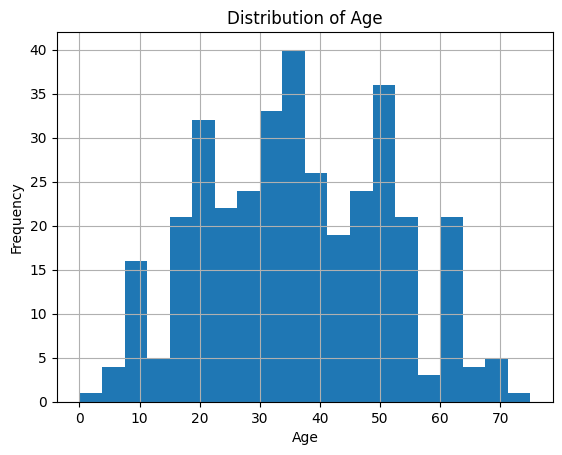

Skewness of age: 0.07335210626078169


In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'age' column
df['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check the skewness of the 'age' column
skewness = df['age'].skew()
print(f'Skewness of age: {skewness}')

In [10]:
if abs(skewness) < 0.5:
    # Replace NaN with mean
    df['age'].fillna(df['age'].mean(), inplace=True)
else:
    # Replace NaN with median
    df['age'].fillna(df['age'].median(), inplace=True)

In [11]:
print(df['age'].isnull().sum())
print(df['age'].head())

0
0    55.0
1     8.0
2    26.0
3    40.0
4    45.0
Name: age, dtype: float64


In [12]:
categorical_columns = [col for col in df.columns if col != 'age']

# Convert specified columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

In [13]:
print(df.dtypes)

erythema                               category
scaling                                category
definite_borders                       category
itching                                category
koebner_phenomenon                     category
polygonal_papules                      category
follicular_papules                     category
oral_mucosal_involvement               category
knee_and_elbow_involvement             category
scalp_involvement                      category
family_history                         category
melanin_incontinence                   category
eosinophils_infiltrate                 category
PNL_infiltrate                         category
fibrosis_papillary_dermis              category
exocytosis                             category
acanthosis                             category
hyperkeratosis                         category
parakeratosis                          category
clubbing_rete_ridges                   category
elongation_rete_ridges                 c

In [14]:
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [15]:
#Check the data types of each column
df.dtypes

,0
erythema,category
scaling,category
definite_borders,category
itching,category
koebner_phenomenon,category
polygonal_papules,category
follicular_papules,category
oral_mucosal_involvement,category
knee_and_elbow_involvement,category
scalp_involvement,category


In [16]:
df.shape

(366, 35)

In [17]:
#Check for duplicates in the entire DataFrame
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


**Splitting the data to train and test**

In [18]:
#Features (all columns except the target column)
X = df.drop(columns=['class'])
#Target variable
y = df['class']

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting datasets to verify the split
print("Training set - Features shape:", X_train.shape, " Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape, " Target shape:", y_test.shape)

Training set - Features shape: (292, 34)  Target shape: (292,)
Testing set - Features shape: (74, 34)  Target shape: (74,)


# **PCA**


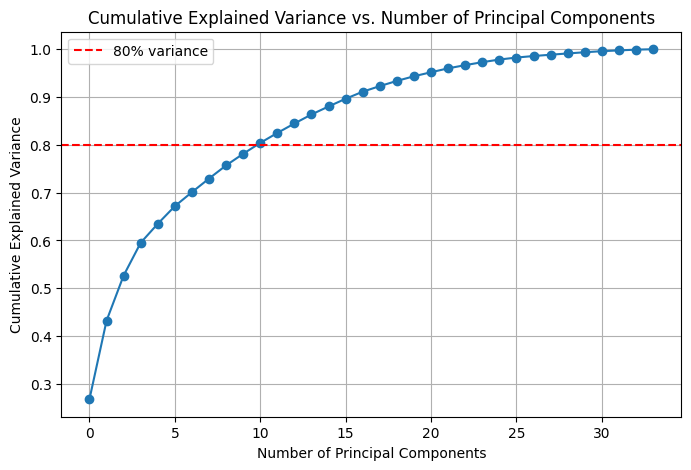

Number of components needed to explain 80% variance: 11


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and X_test are already defined and preprocessed

# Convert categorical features to integer type
categorical_cols = X_train.select_dtypes(include=['category']).columns
X_train[categorical_cols] = X_train[categorical_cols].astype(int)
X_test[categorical_cols] = X_test[categorical_cols].astype(int)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot cumulative variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Determine number of components needed to explain 80% variance
n_components_80 = np.argmax(explained_variance >= 0.80) + 1
print(f'Number of components needed to explain 80% variance: {n_components_80}')


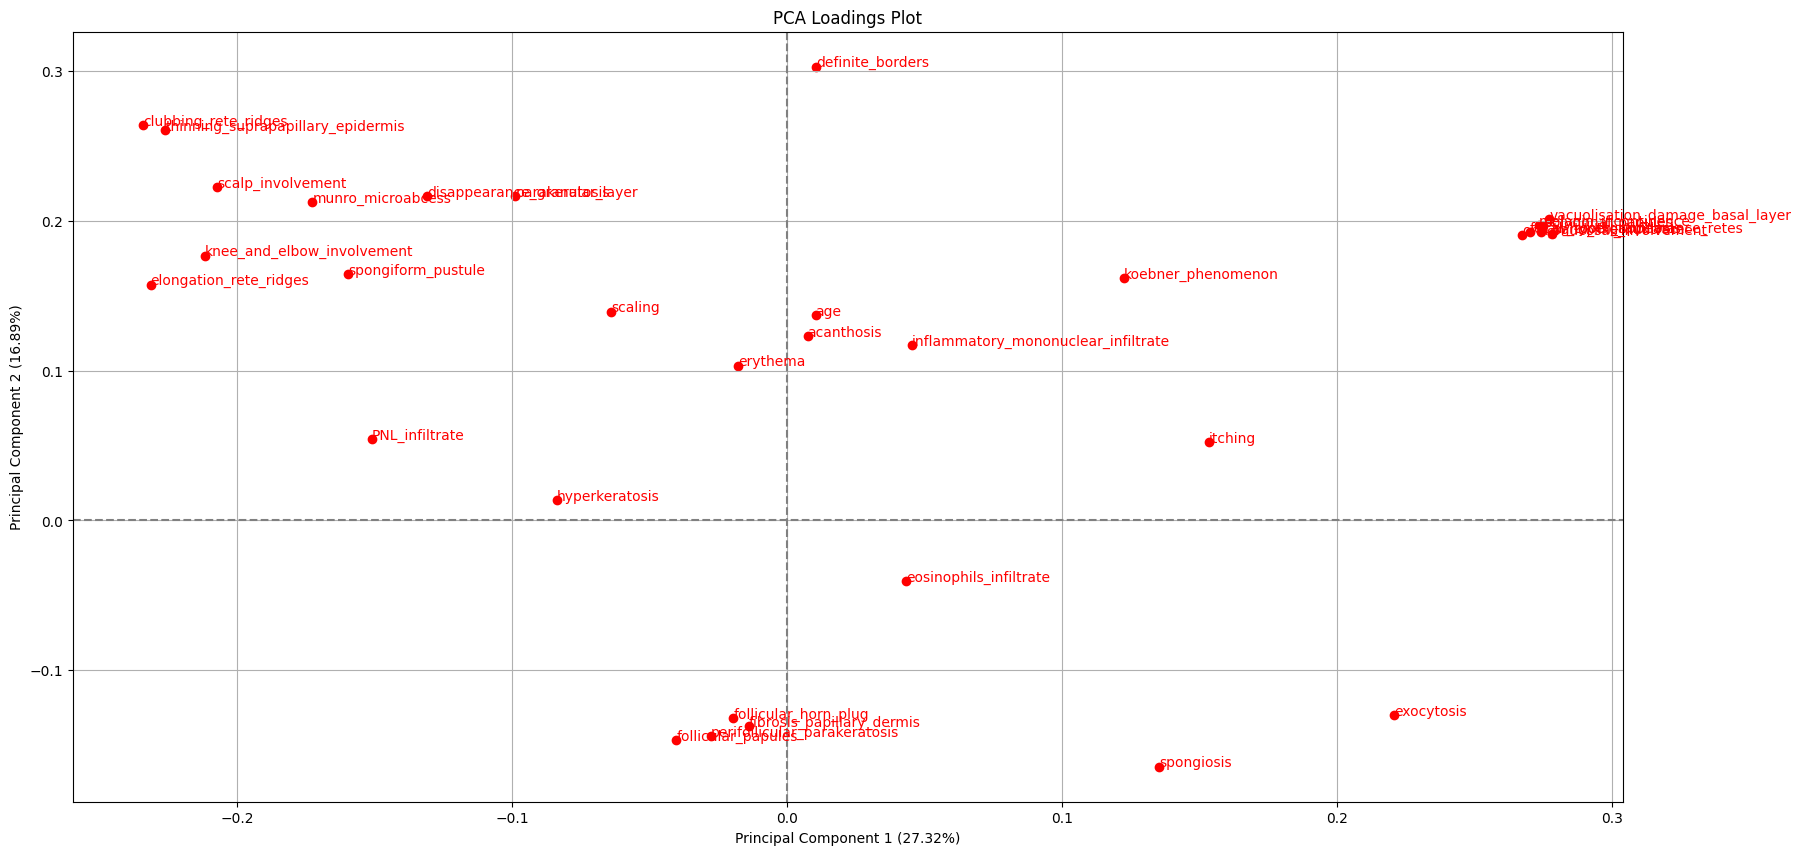

In [20]:
# Remove 'family_history' feature from both training and testing sets
X_train = X_train.drop(columns=['family_history'])
X_test = X_test.drop(columns=['family_history'])

categorical_cols = X_train.select_dtypes(include=['category']).columns
X_train[categorical_cols] = X_train[categorical_cols].astype(int)
X_test[categorical_cols] = X_test[categorical_cols].astype(int)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance percentages
explained_variance = pca.explained_variance_ratio_ * 100

# Create a DataFrame with PCA components and feature names
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_train_scaled.shape[1])], index=X_train.columns)

# Plot loadings
plt.figure(figsize=(20, 10))
plt.scatter(loadings_df.iloc[:, 0], loadings_df.iloc[:, 1], color='r')

# Annotate points with feature names
for i in range(len(X_train.columns)):
    plt.text(loadings_df.iloc[i, 0], loadings_df.iloc[i, 1], X_train.columns[i], color='r')

# Label the axes with the explained variance percentages
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.title('PCA Loadings Plot')
plt.grid()
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()


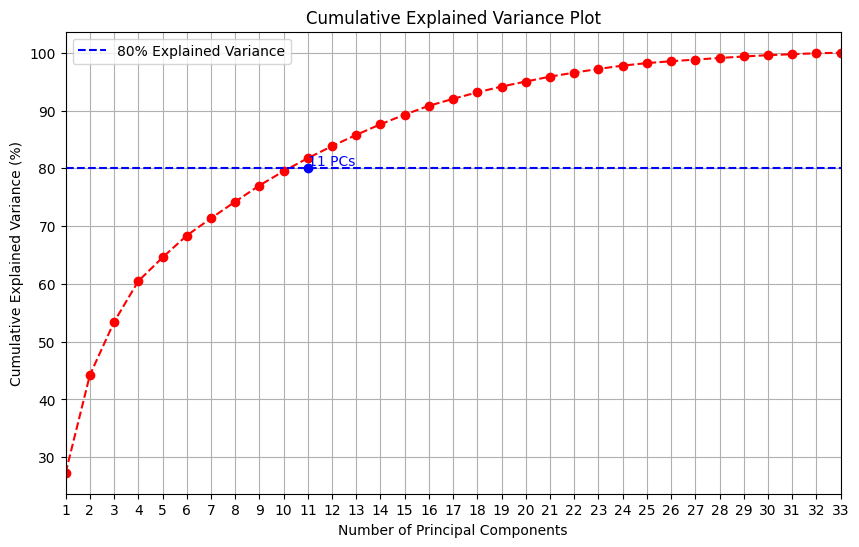

Number of principal components needed to explain at least 80% of the variance: 11


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pca is already fitted
explained_variance = pca.explained_variance_ratio_ * 100

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.axhline(y=80, color='b', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)

# Highlight the number of components that explain 80% variance
components_needed = np.argmax(cumulative_explained_variance >= 80) + 1
plt.scatter(components_needed, 80, color='blue', zorder=5)
plt.text(components_needed, 80, f'{components_needed} PCs', horizontalalignment='left', verticalalignment='bottom', color='blue')

# Set x-axis limits and ticks
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlim(1, len(cumulative_explained_variance))

plt.legend()
plt.show()

print(f'Number of principal components needed to explain at least 80% of the variance: {components_needed}')




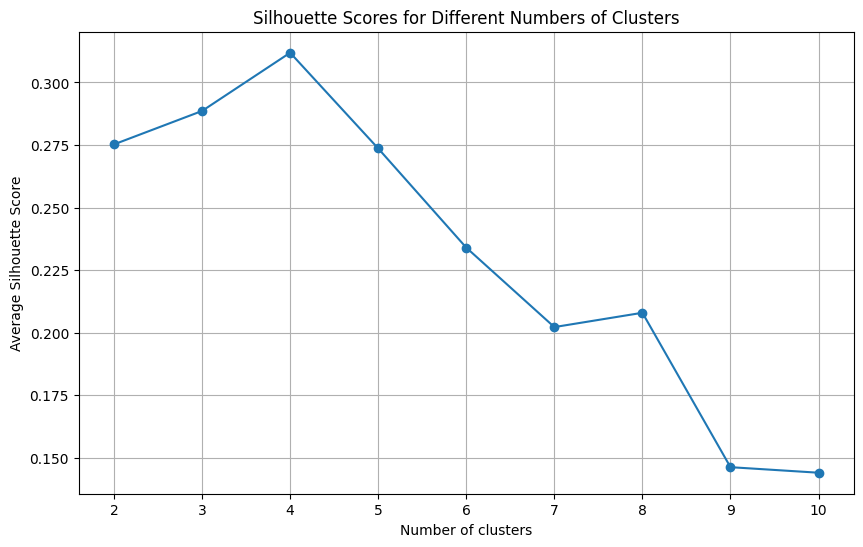

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range for the number of clusters
range_n_clusters = list(range(2, 11))

# List to store the average silhouette scores for each number of clusters
silhouette_avg_scores = []

# Loop over the range of clusters and calculate the silhouette score for each
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Apply K-Means Clustering with the optimal number of clusters (assuming optimal_k = 3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_train_pca, clusters)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 3 clusters: 0.2886013203263331


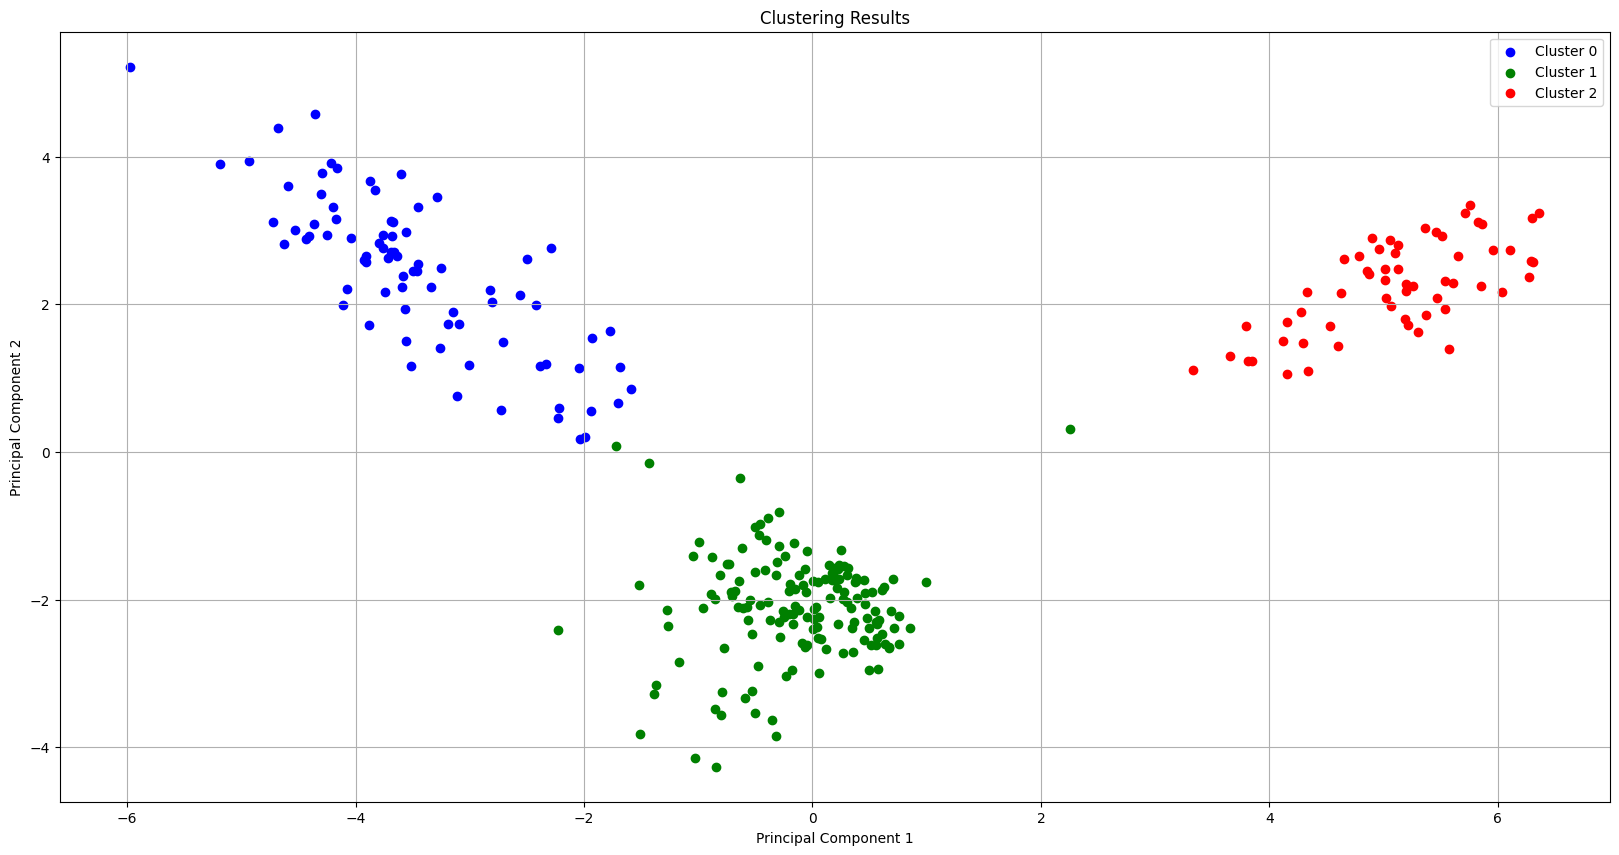

In [24]:
# Apply K-Means Clustering with the optimal number of clusters (assuming optimal_k = 3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Add cluster labels to the PCA DataFrame
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(20, 10))
colors = ['b', 'g', 'r']
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.legend()
plt.grid()
plt.show()

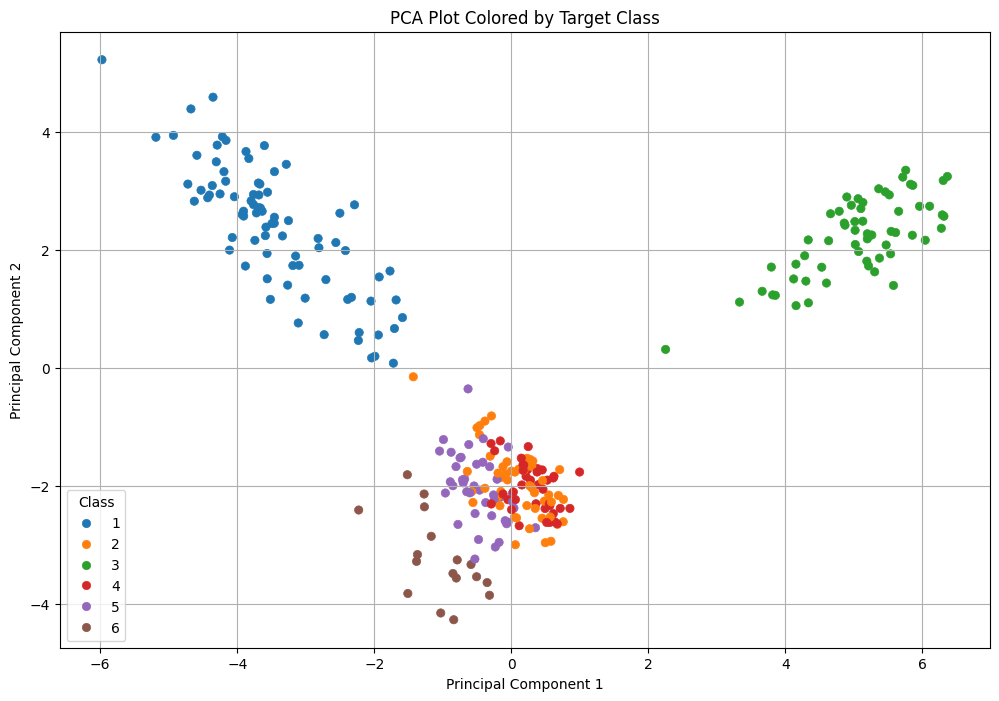

In [25]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with PCA components and target labels
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y_train.values  # Add target labels
# Define a distinct color palette
palette = sns.color_palette('tab10', n_colors=len(y_train.unique()))
# Plot PCA results with colors representing classes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette=palette, edgecolor=None)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot Colored by Target Class')
plt.legend(title='Class')
plt.grid()
plt.show()

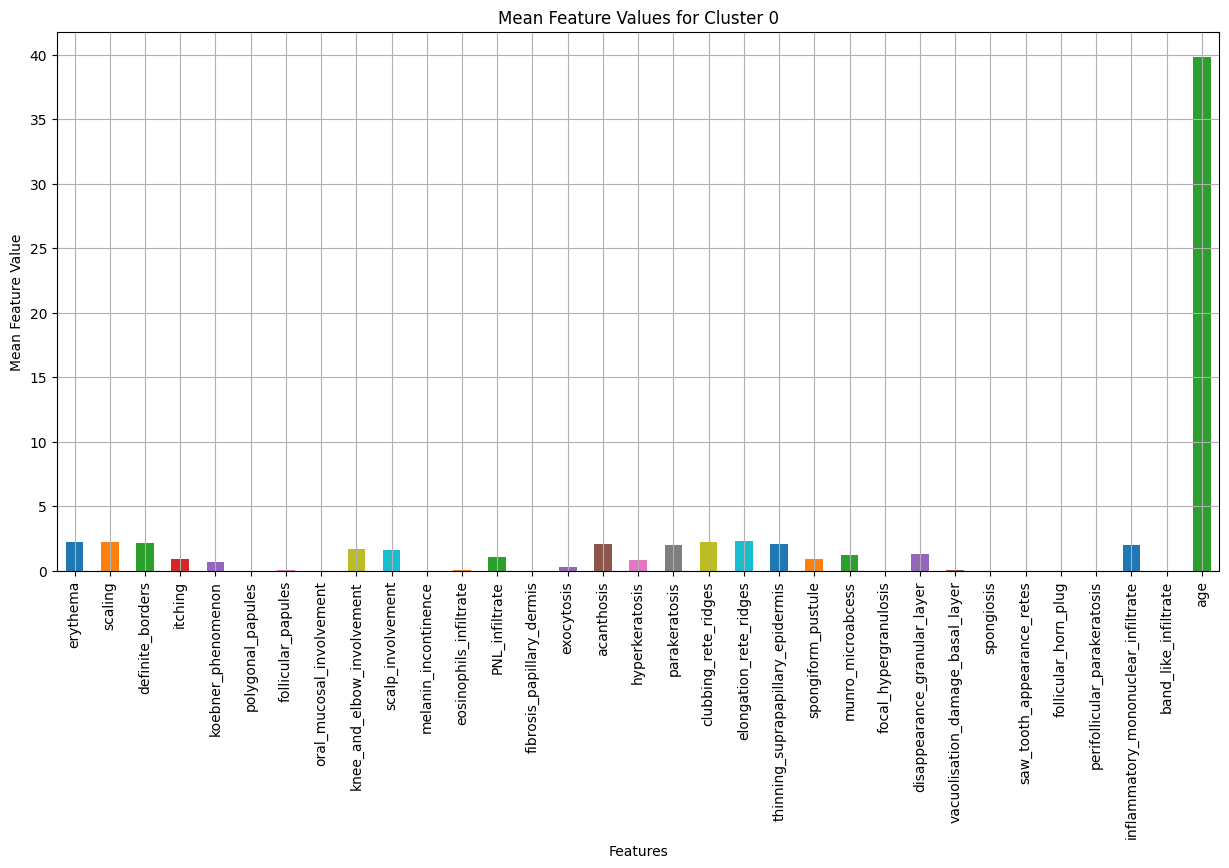

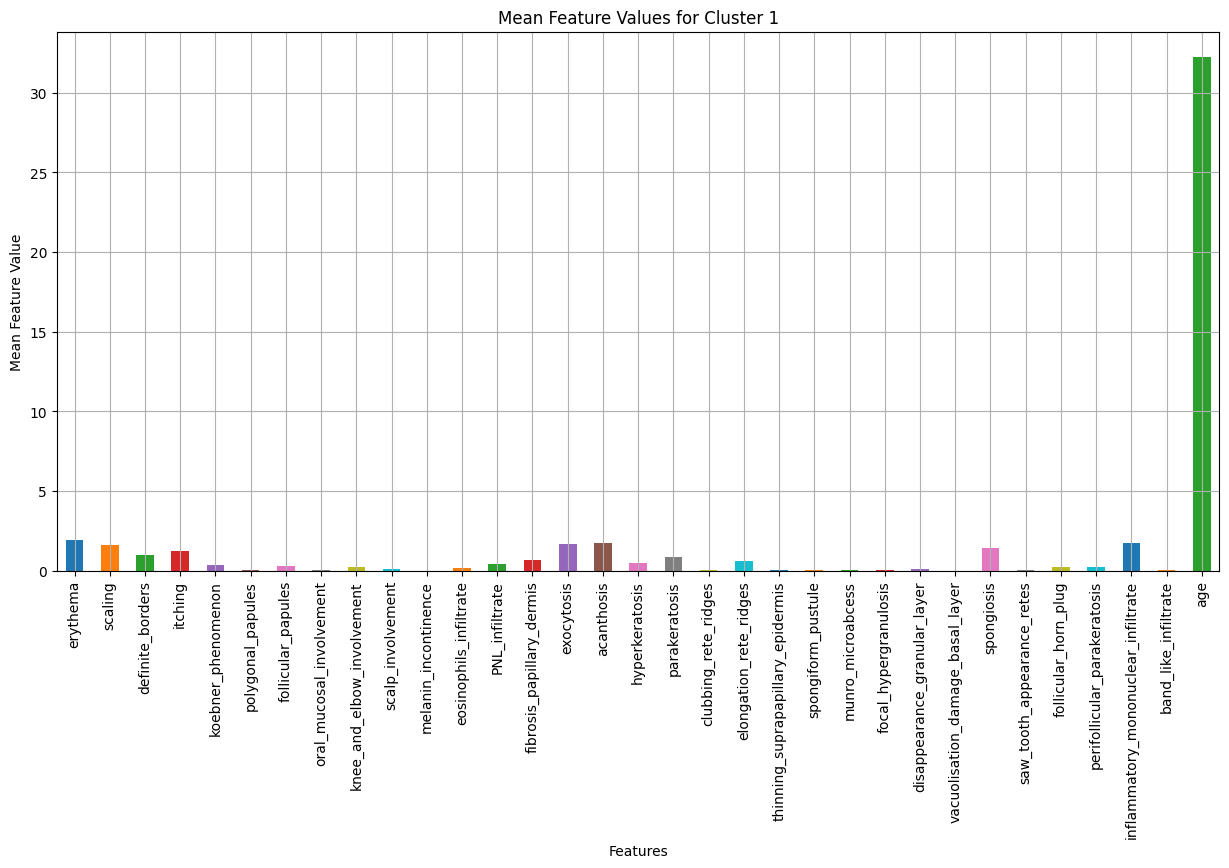

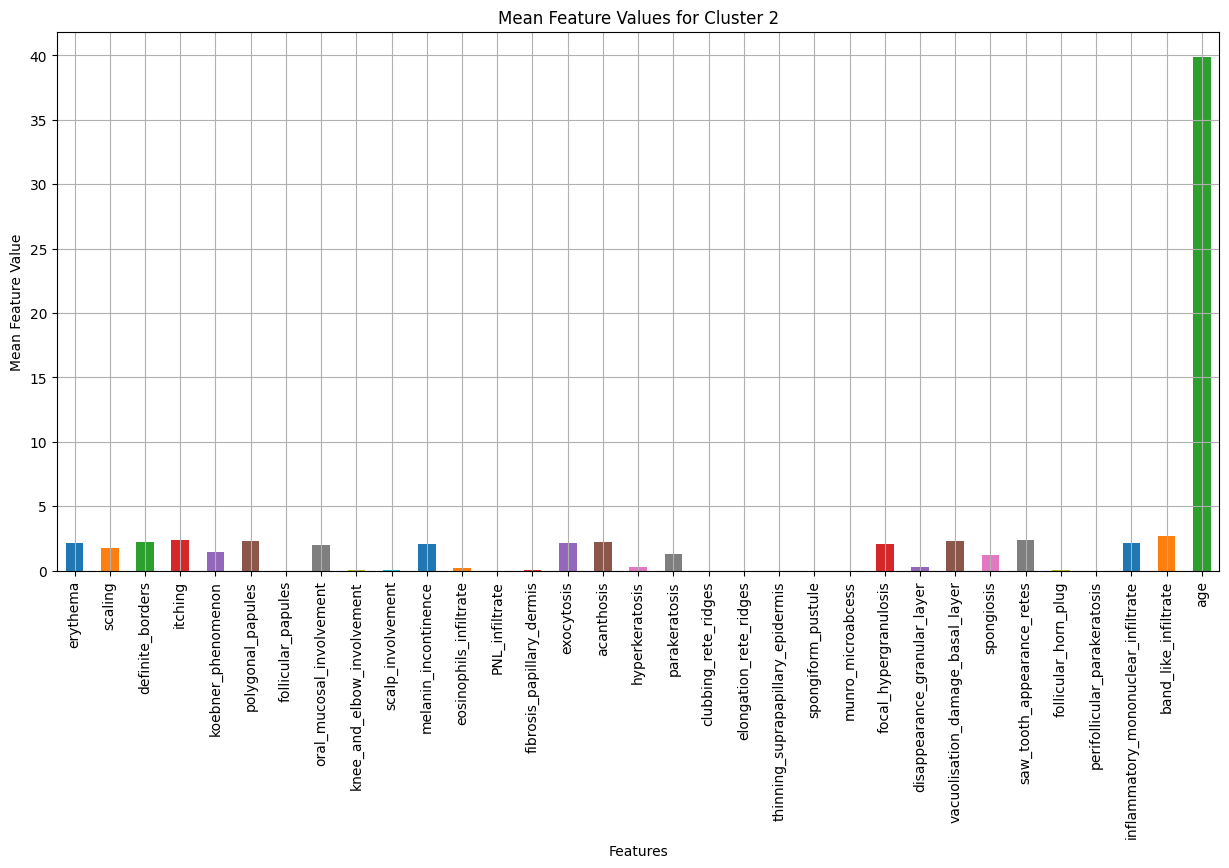

<Figure size 1500x700 with 0 Axes>

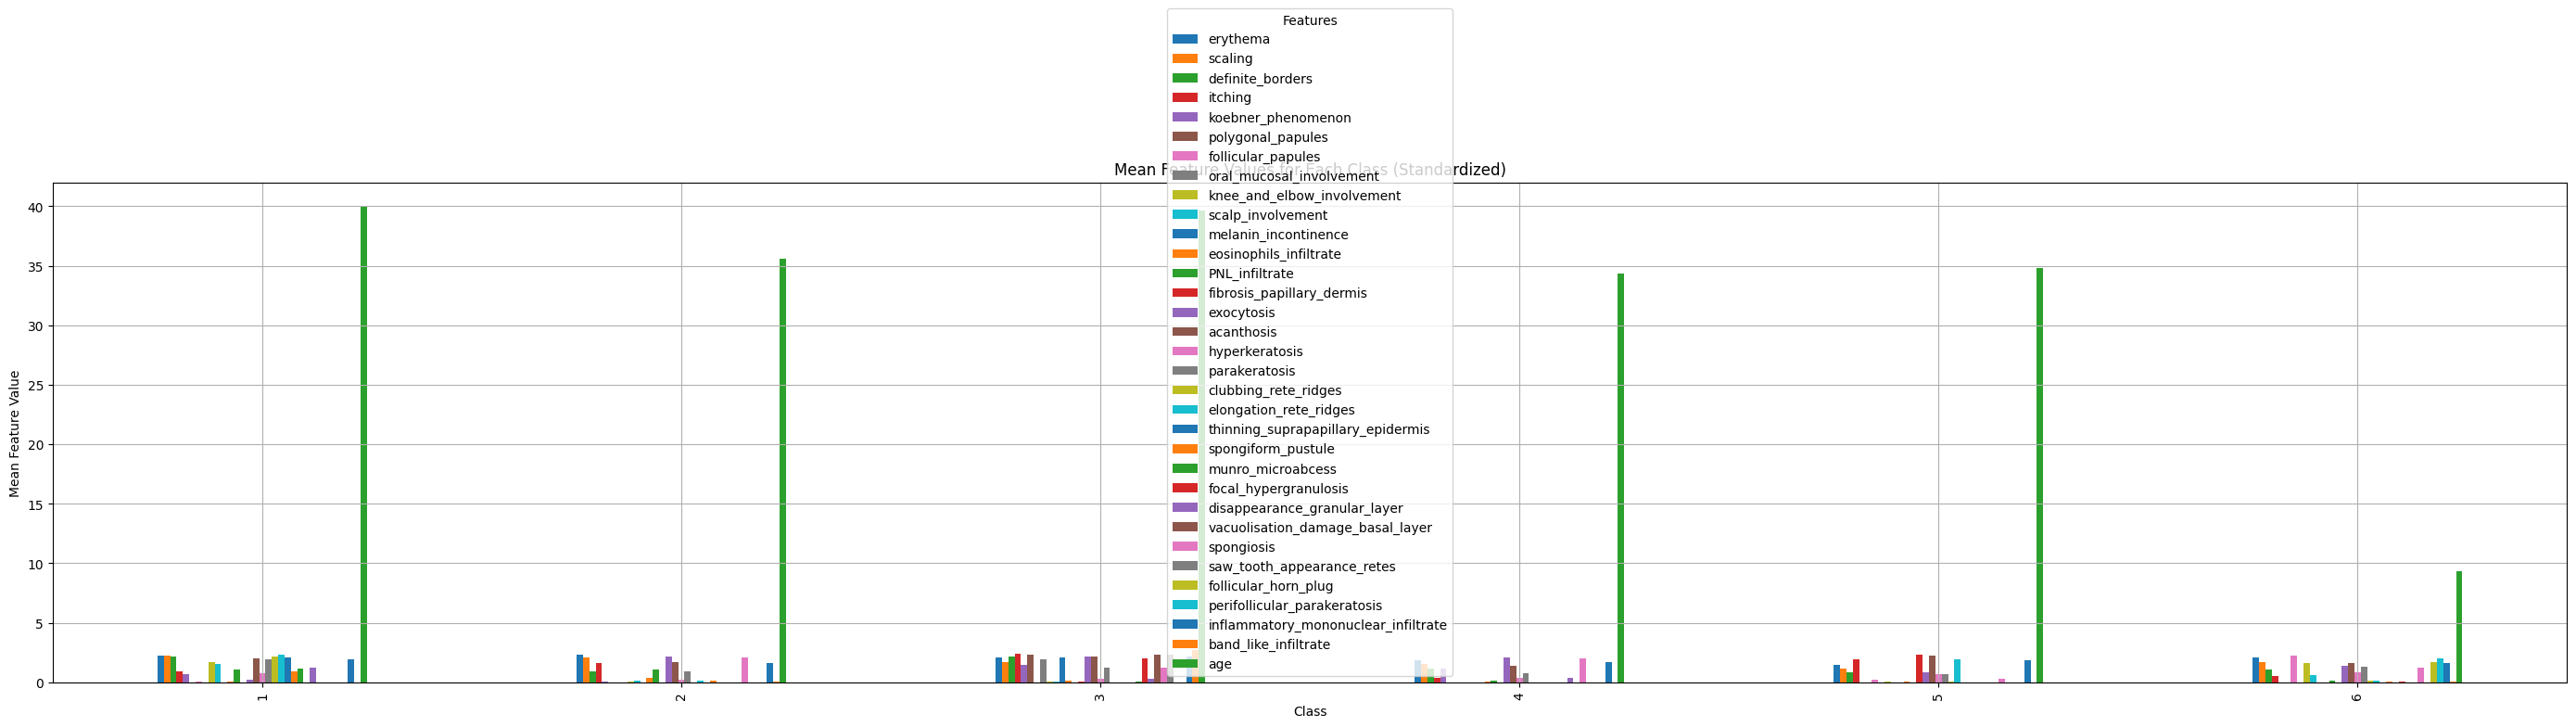

In [26]:
#Analysis of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Calculate the mean value of each feature for each cluster
df_with_clusters = pd.DataFrame(X_train, columns=X_train.columns)  # Use scaled data
df_with_clusters['Cluster'] = clusters
cluster_means = df_with_clusters.groupby('Cluster').mean()

# Define a color palette
colors = sns.color_palette("tab10", n_colors=len(X_train.columns))

# Plot the mean values of features for each cluster separately with distinct colors for each feature
for cluster in range(optimal_k):
    plt.figure(figsize=(15, 7))
    cluster_means.iloc[cluster].plot(kind='bar', color=colors)
    plt.title(f'Mean Feature Values for Cluster {cluster}')
    plt.xlabel('Features')
    plt.ylabel('Mean Feature Value')
    plt.grid()
    plt.show()

# Calculate the mean value of each feature for each class
df_with_classes = pd.DataFrame(X_train, columns=X_train.columns)  # Use scaled data
df_with_classes['Class'] = y_train.values
class_means = df_with_classes.groupby('Class').mean()

# Plot the mean values of features for each class with distinct colors for each feature
plt.figure(figsize=(15, 7))
class_means.plot(kind='bar', color=colors, figsize=(35, 7))
plt.title('Mean Feature Values for Each Class (Standardized)')
plt.xlabel('Class')
plt.ylabel('Mean Feature Value')
plt.legend(title='Features')
plt.grid()
plt.show()

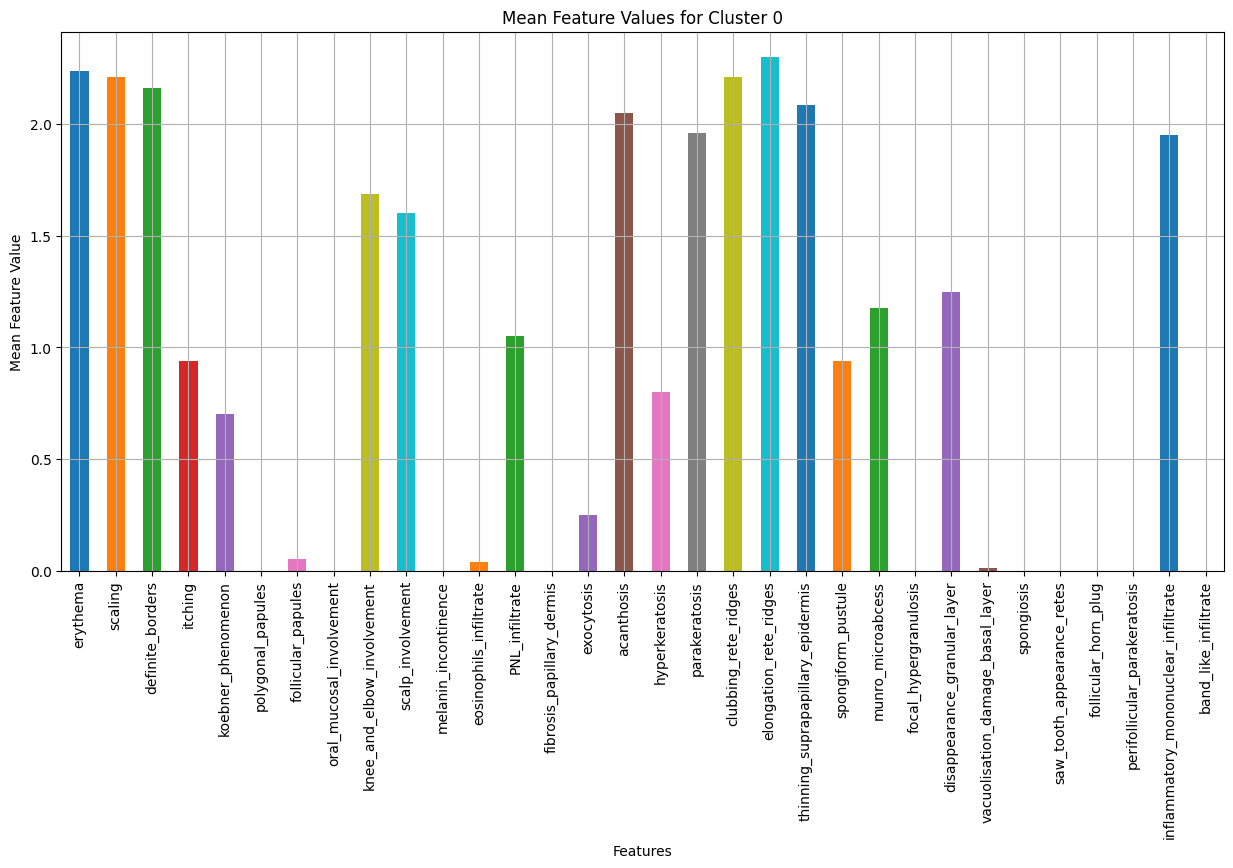

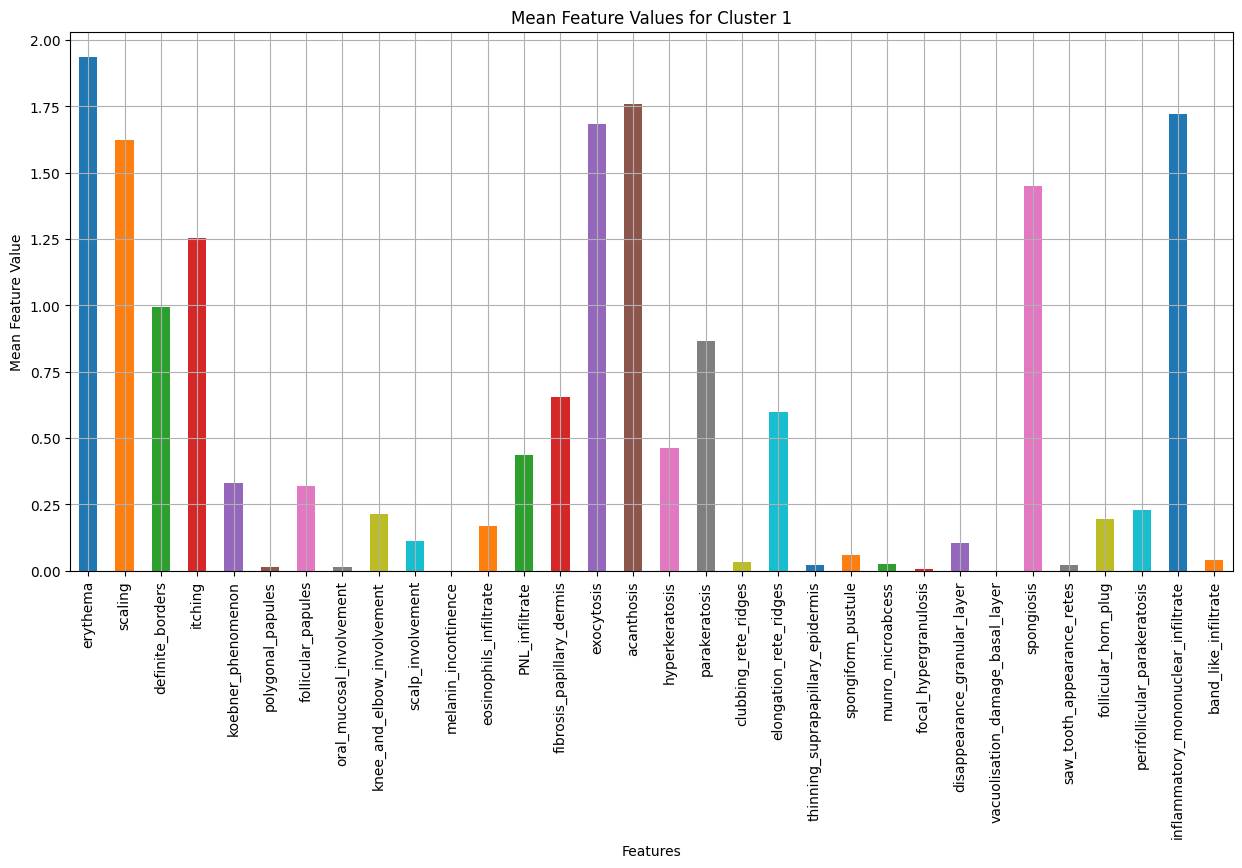

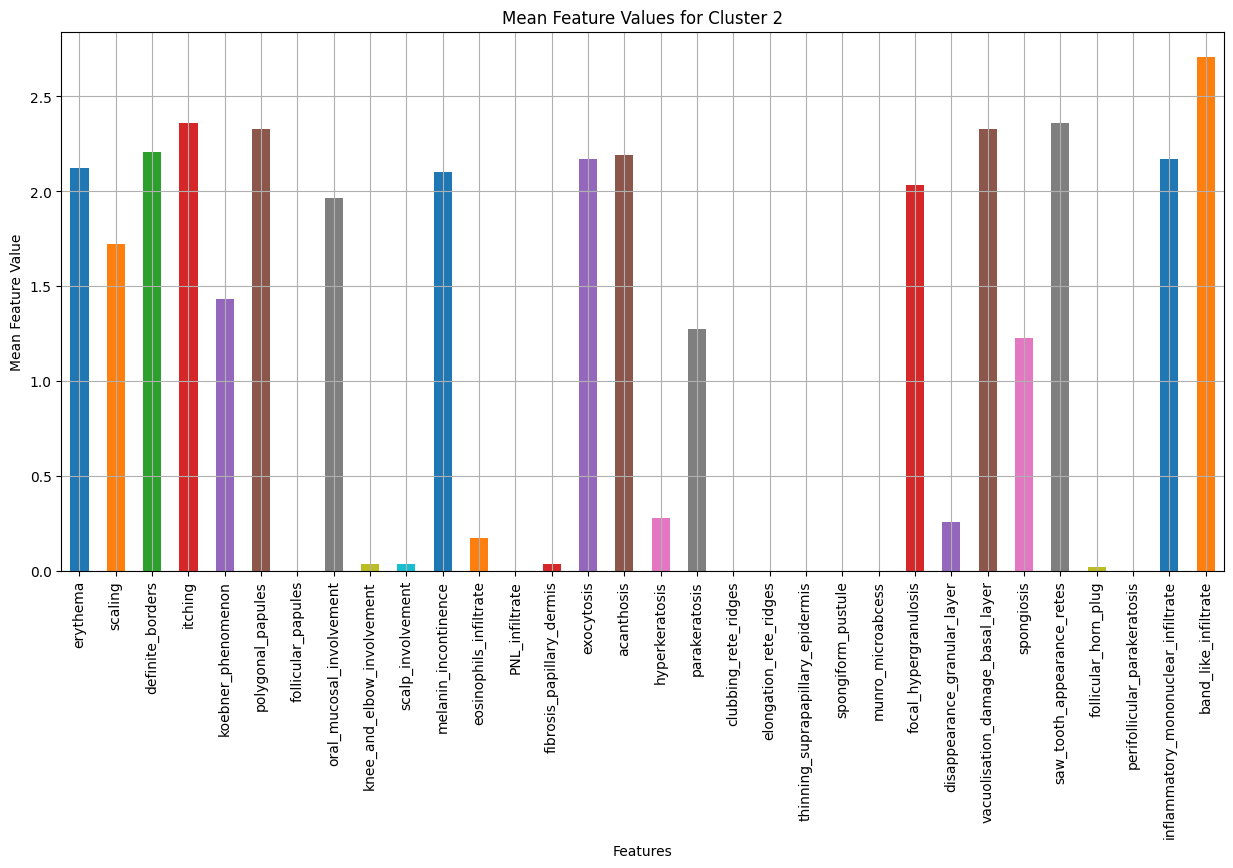

<Figure size 1500x700 with 0 Axes>

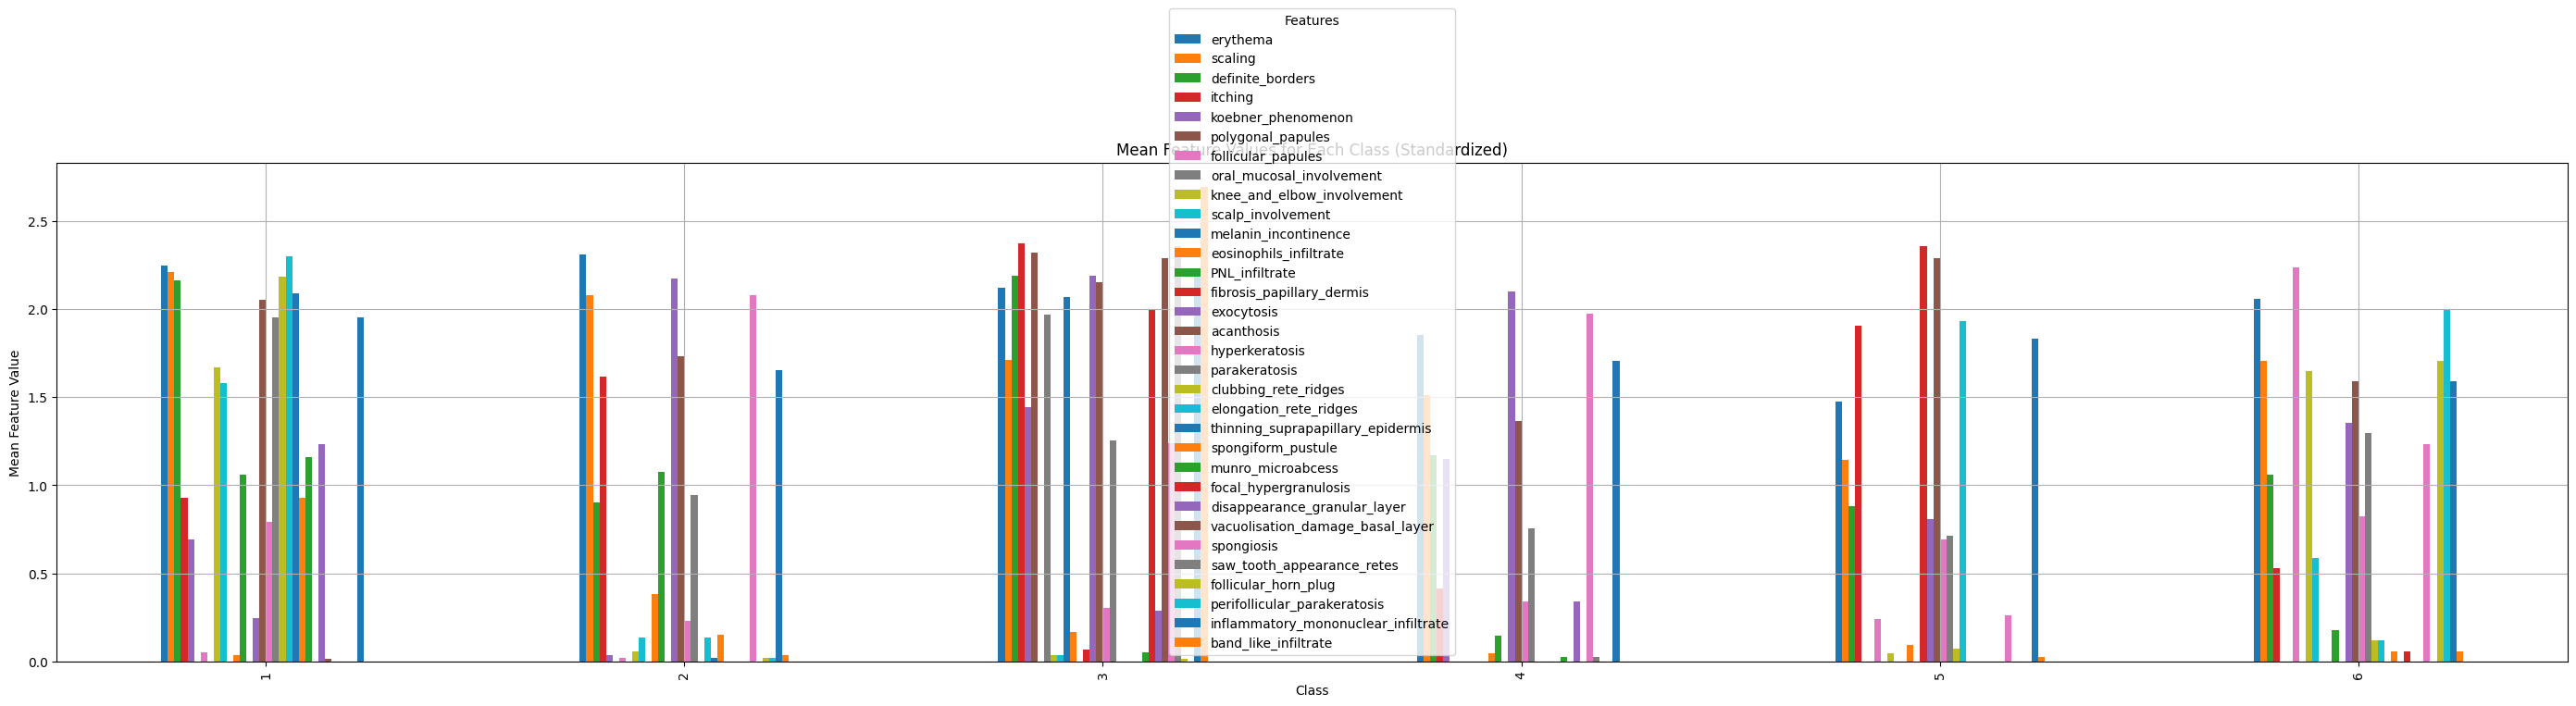

In [27]:
# Assuming X_train_pca, X_train, and y_train are already defined
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Add cluster labels to the PCA DataFrame
pca_df = pd.DataFrame(X_train_pca)  # Create PCA DataFrame if not already created
pca_df['Cluster'] = clusters

# Calculate the mean value of each feature for each cluster, excluding 'age'
df_with_clusters = pd.DataFrame(X_train, columns=X_train.columns).drop(columns='age')
df_with_clusters['Cluster'] = clusters
cluster_means = df_with_clusters.groupby('Cluster').mean()

# Define a color palette
colors = sns.color_palette("tab10", n_colors=len(df_with_clusters.columns))

# Plot the mean values of features for each cluster separately with distinct colors for each feature
for cluster in range(optimal_k):
    plt.figure(figsize=(15, 7))
    cluster_means.iloc[cluster].plot(kind='bar', color=colors)
    plt.title(f'Mean Feature Values for Cluster {cluster}')
    plt.xlabel('Features')
    plt.ylabel('Mean Feature Value')
    plt.grid()
    plt.show()

# Calculate the mean value of each feature for each class, excluding 'age'
df_with_classes = pd.DataFrame(X_train, columns=X_train.columns).drop(columns='age')
df_with_classes['Class'] = y_train.values
class_means = df_with_classes.groupby('Class').mean()

# Plot the mean values of features for each class with distinct colors for each feature
plt.figure(figsize=(15, 7))
class_means.plot(kind='bar', color=colors, figsize=(35, 7))
plt.title('Mean Feature Values for Each Class (Standardized)')
plt.xlabel('Class')
plt.ylabel('Mean Feature Value')
plt.legend(title='Features')
plt.grid()
plt.show()

In [28]:
# Print the explained variance ratio for the first and second principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for Principal Component 1:", explained_variance_ratio[0])
print("Explained variance ratio for Principal Component 2:", explained_variance_ratio[1])

Explained variance ratio for Principal Component 1: 0.273238476488684
Explained variance ratio for Principal Component 2: 0.16894990716401834


Number of outliers (robust): 121


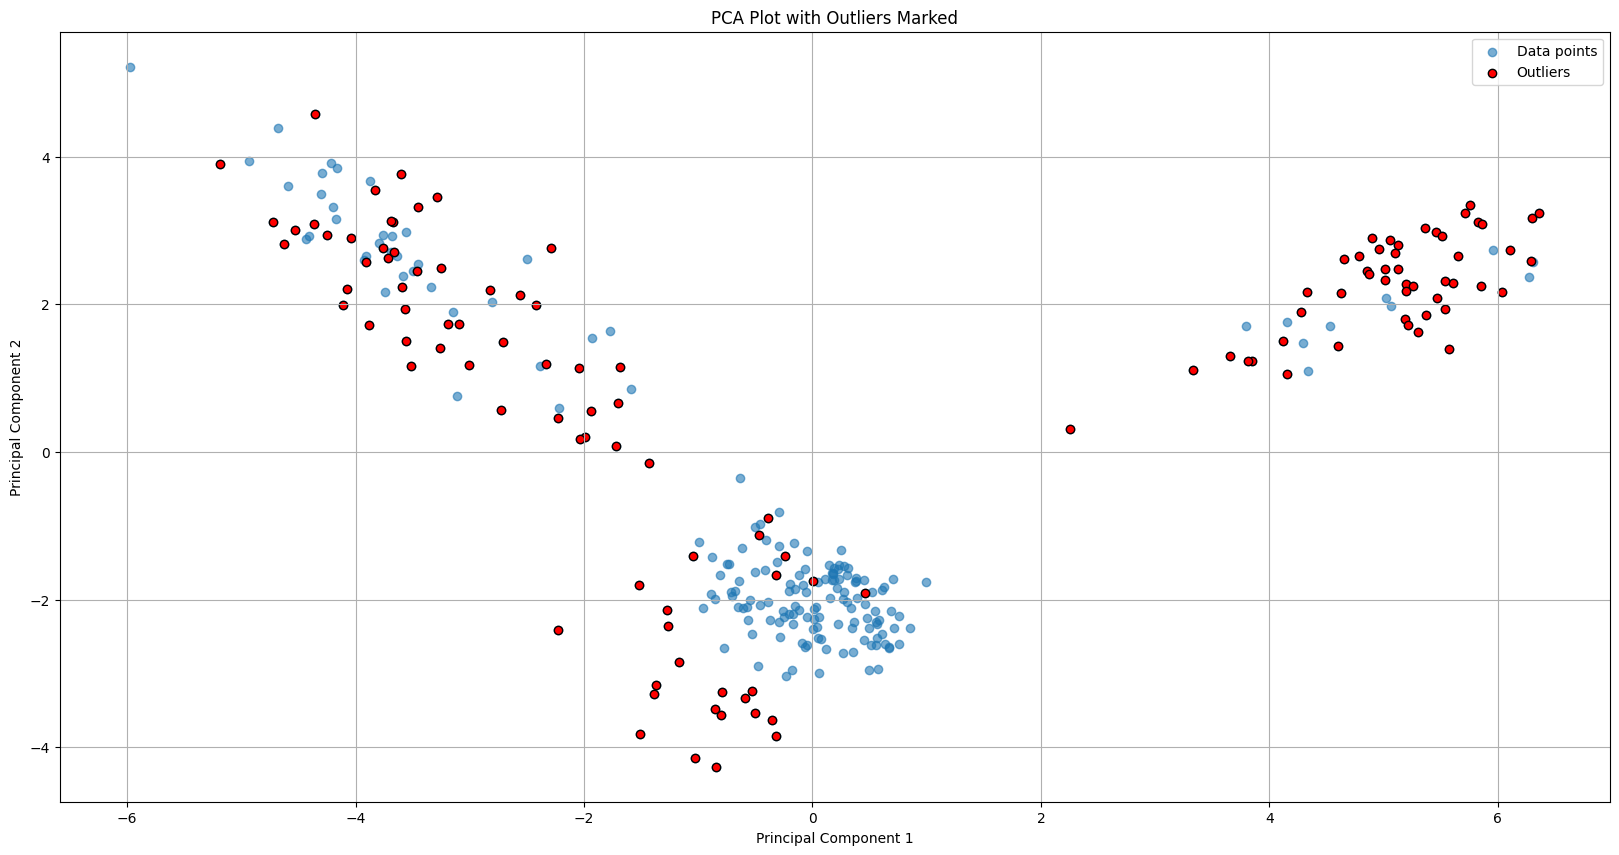

In [29]:
# Find outliers using Mahalanobis distance with robust covariance
robust_cov = MinCovDet().fit(X_train_scaled)
md_robust = robust_cov.mahalanobis(X_train_scaled)
threshold_robust = chi2.ppf((1 - 0.01), df=X_train_scaled.shape[1])
outliers_robust = np.where(md_robust > threshold_robust)[0]

# Count of outliers
num_outliers_robust = len(outliers_robust)
print(f"Number of outliers (robust): {num_outliers_robust}")

# PCA plot with marked outliers
plt.figure(figsize=(20, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Data points', alpha=0.6)
plt.scatter(X_train_pca[outliers_robust, 0], X_train_pca[outliers_robust, 1], color='r', label='Outliers', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers Marked')
plt.legend()
plt.grid()
plt.show()


Number of outliers (Isolation Forest): 3


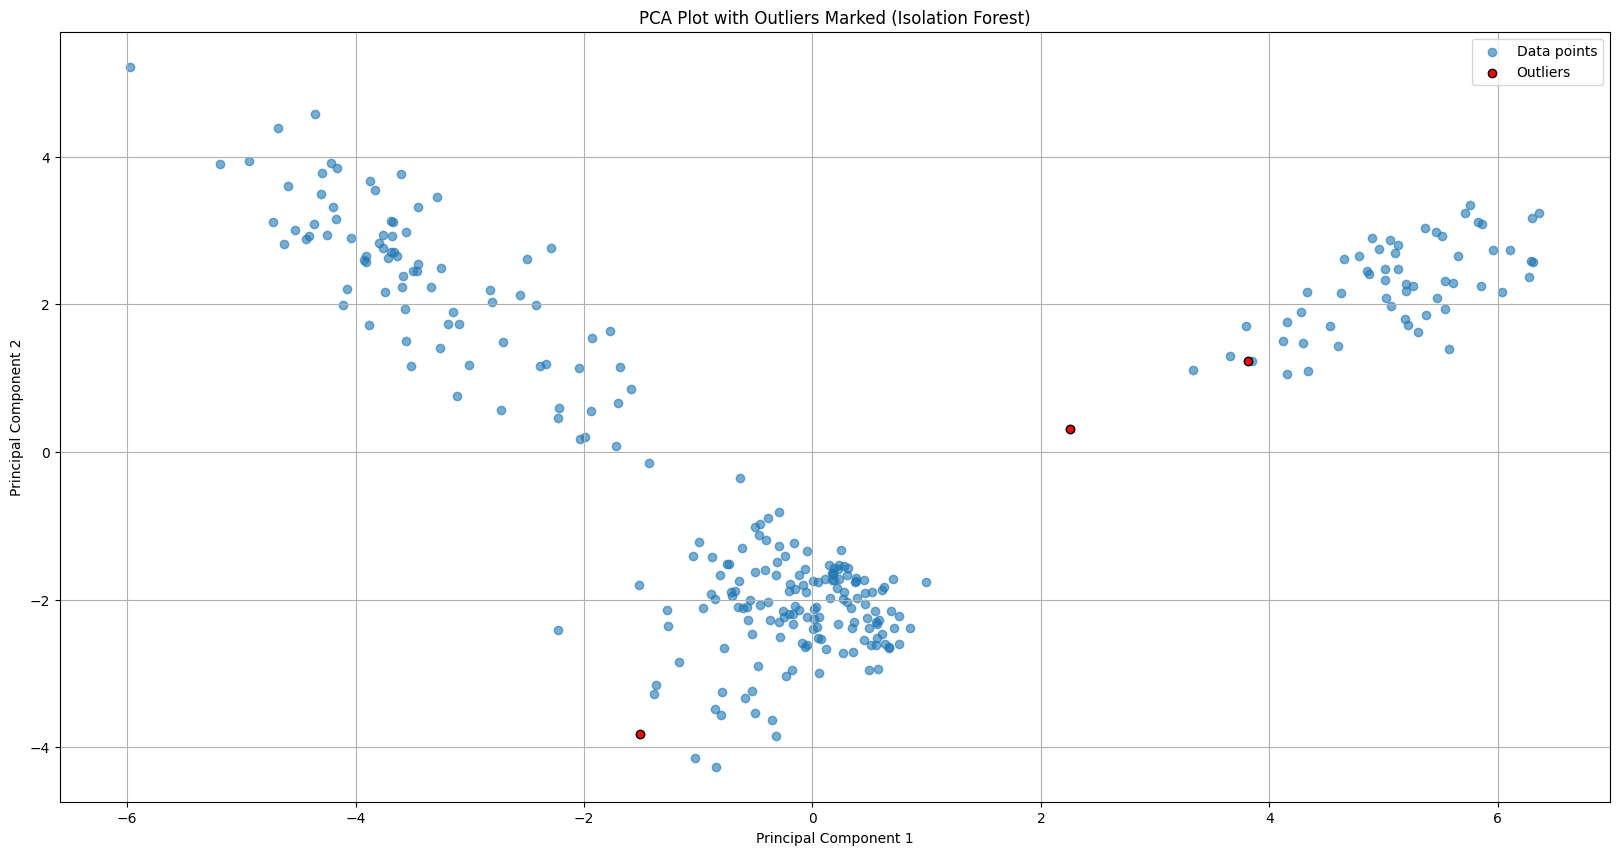

In [30]:
# Use Isolation Forest to find outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso_forest.fit_predict(X_train_scaled)
outliers_iso = np.where(outlier_labels == -1)[0]

# Count of outliers using Isolation Forest
num_outliers_iso = len(outliers_iso)
print(f"Number of outliers (Isolation Forest): {num_outliers_iso}")

# PCA plot with marked outliers (Isolation Forest)
plt.figure(figsize=(20, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Data points', alpha=0.6)
plt.scatter(X_train_pca[outliers_iso, 0], X_train_pca[outliers_iso, 1], color='r', label='Outliers', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers Marked (Isolation Forest)')
plt.legend()
plt.grid()
plt.show()
